# import and read data

In [75]:
import numpy as np # Support for large arrays and matrices, along with high-level mathematical functions.
import seaborn as sns # Graphing/Plotting module.
import pandas as pd # CSV handling with operations on tabular data.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from ast import literal_eval # Transform/Parse a string-list into a proper list.
import requests # GET requets to scrap a url/website
from utils import save_classification_report

In [76]:
''' 
There are 2 datasets available for you to use - 
1. 'zero' 
2. 'ustc'
Make sure that 
the path to the .csv files is correct. the following code loads the data from .csv file
into a DataFrame.
'''

dataset_type = 'ustc' # or 'zero' 

filepath = f'./datasets/{dataset_type}/xy_train.csv'
df = pd.read_csv(filepath)
# df

# Graphing for binary classifier

<AxesSubplot:xlabel='label', ylabel='dst2src_min_piat_ms'>

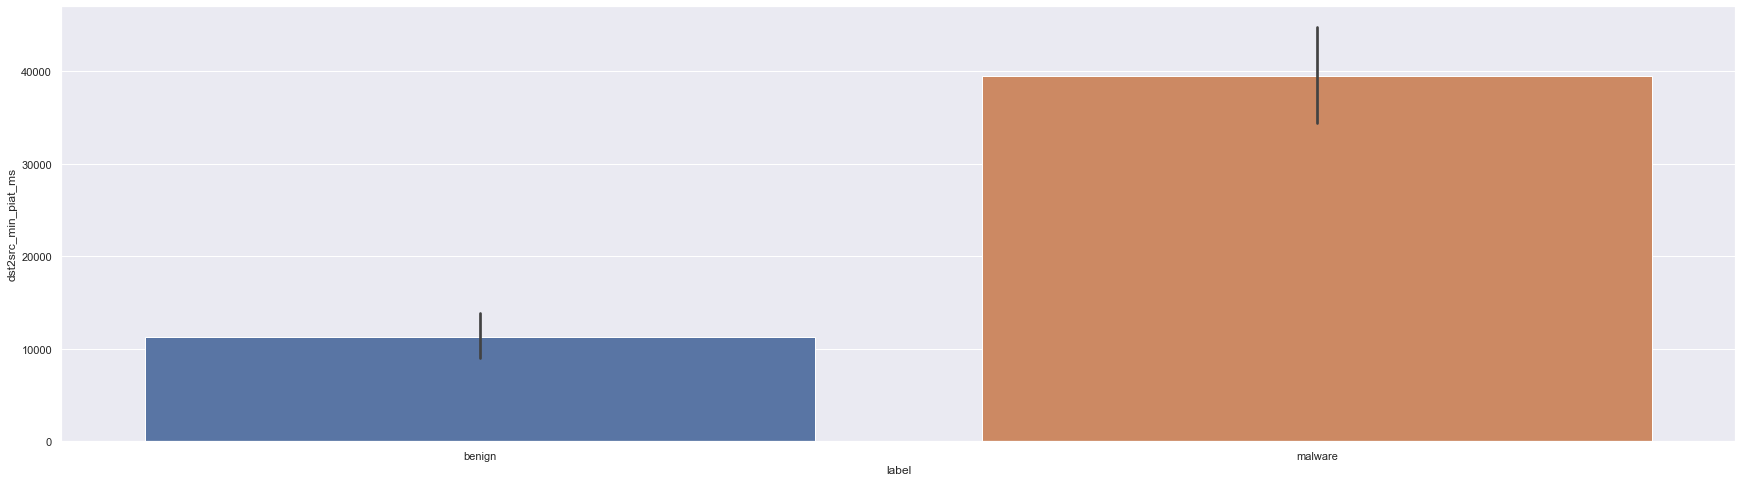

In [78]:
sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(data=df, y='dst2src_min_piat_ms', x='label')

<AxesSubplot:xlabel='label', ylabel='dst2src_min_ps'>

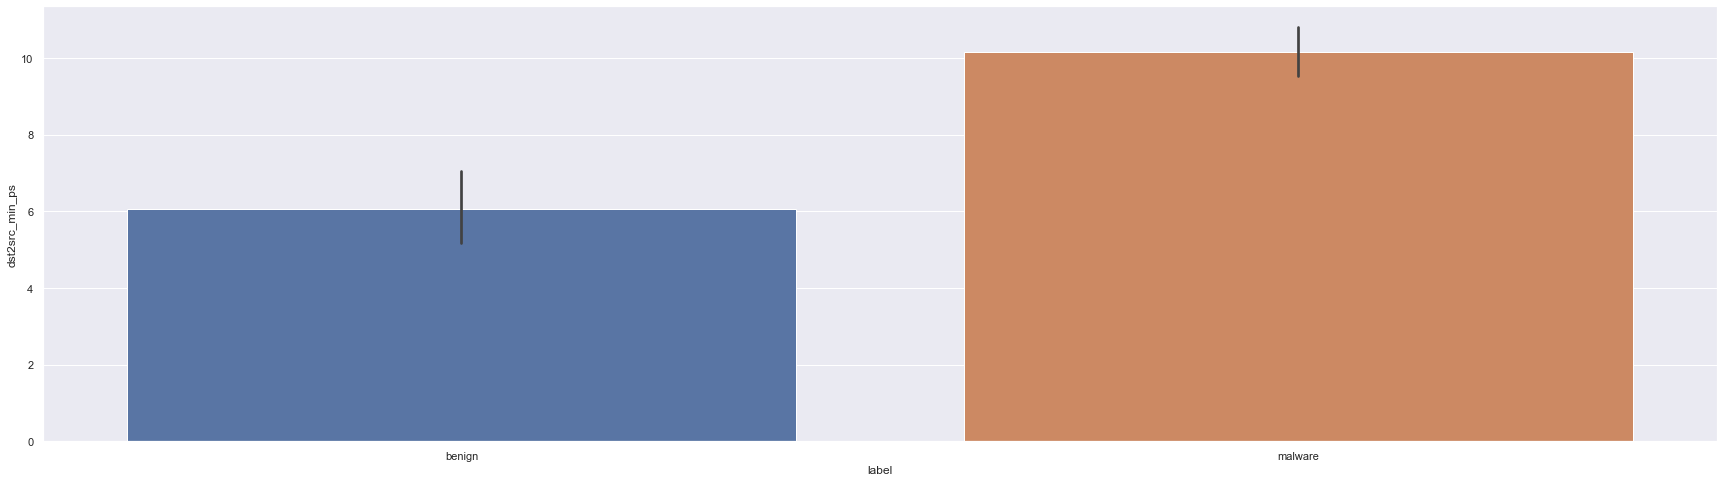

In [79]:
sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(data=df, y='dst2src_min_ps', x='label')

<AxesSubplot:xlabel='label', ylabel='dst2src_ack_packets'>

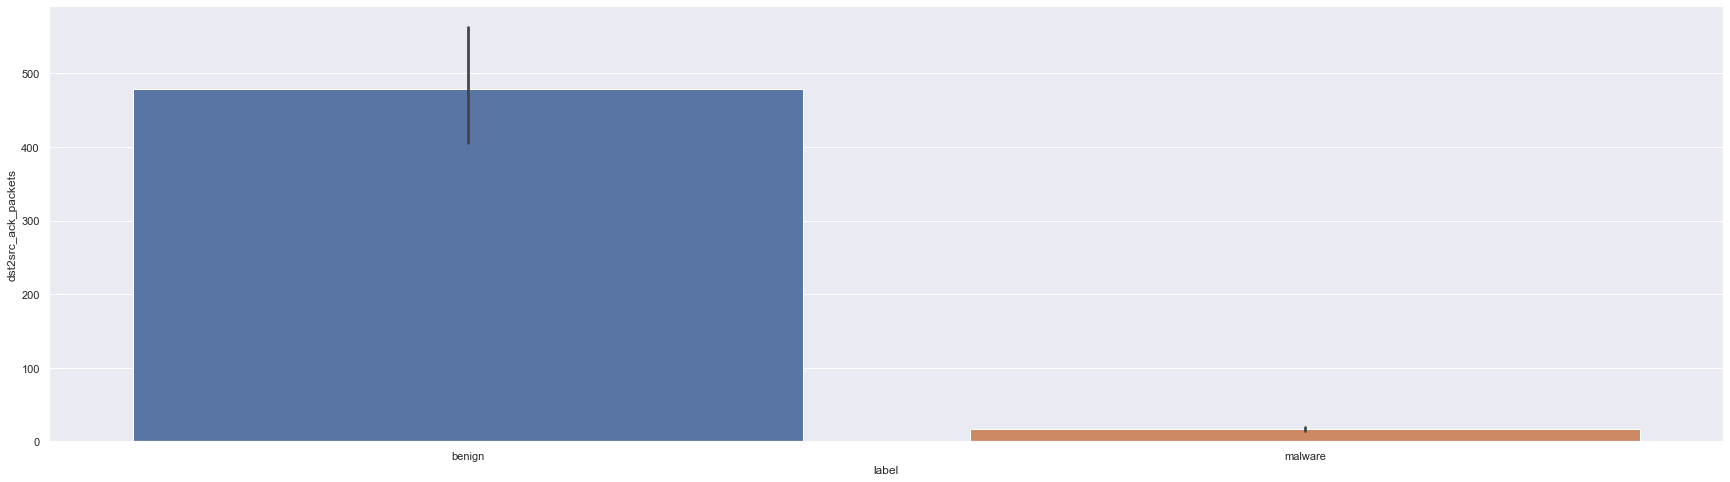

In [80]:
sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(data=df, y='dst2src_ack_packets', x='label')


<AxesSubplot:xlabel='label', ylabel='src2dst_psh_packets'>

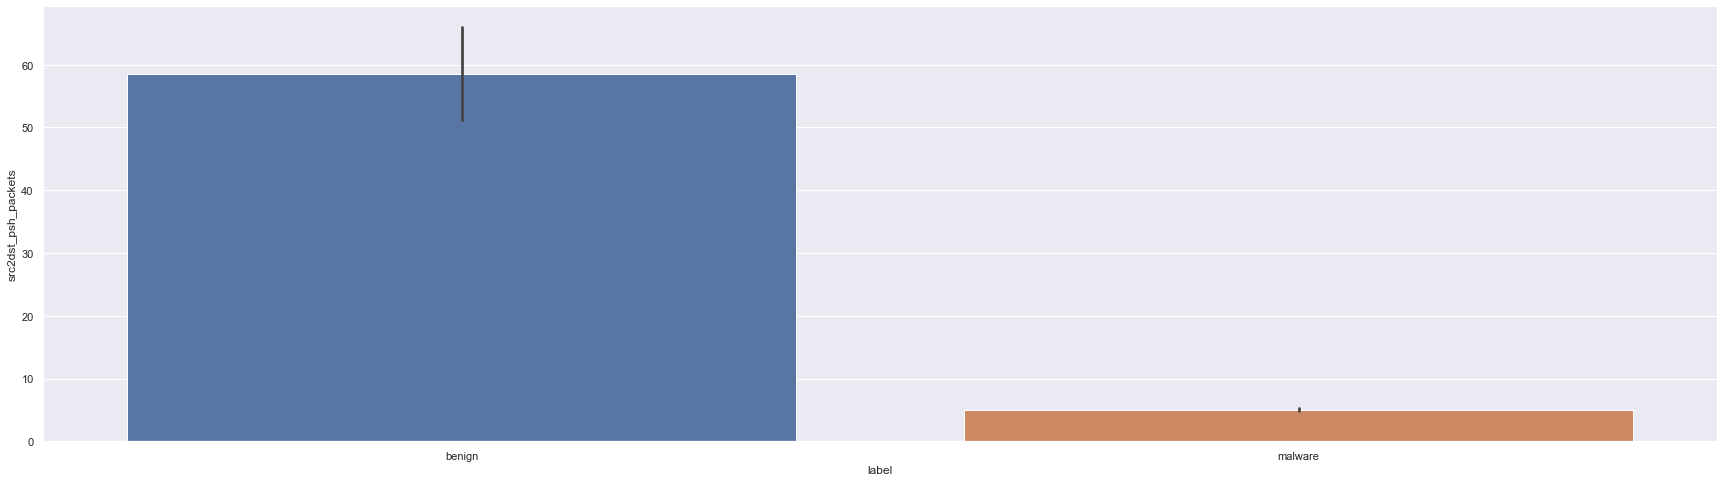

In [81]:
sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(data=df, y='src2dst_psh_packets', x='label')

<AxesSubplot:xlabel='label', ylabel='src2dst_mean_piat_ms'>

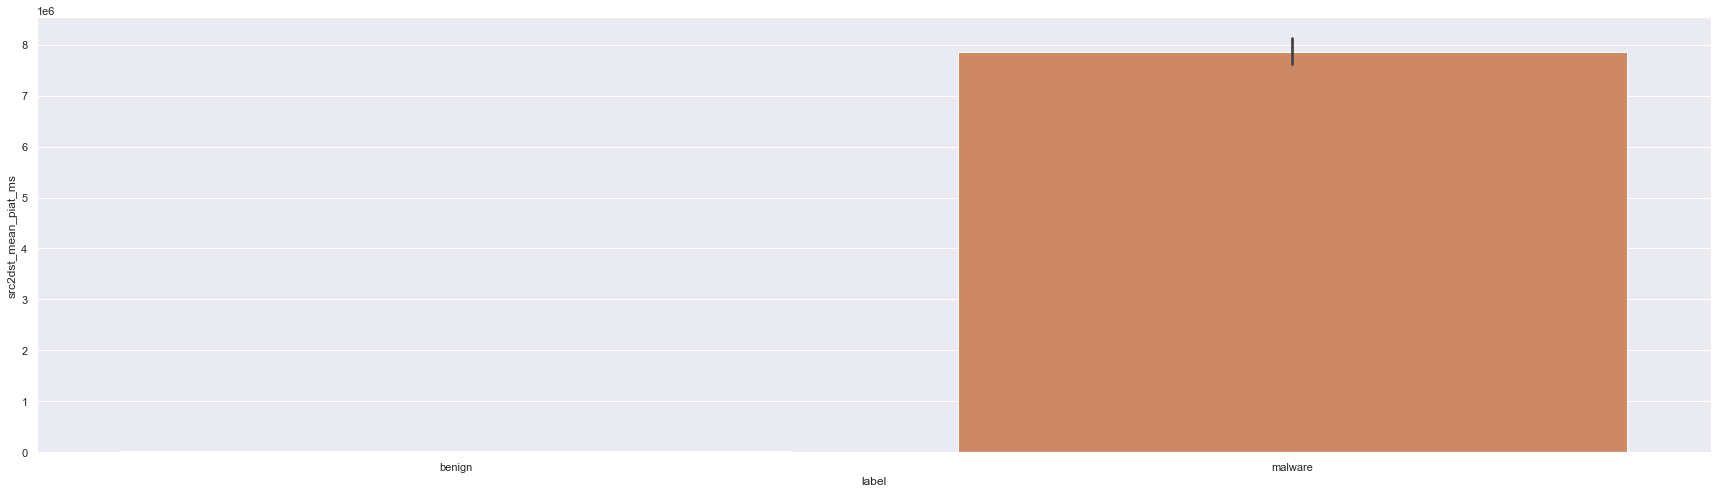

In [82]:
sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(data=df, y='src2dst_mean_piat_ms', x='label')


<AxesSubplot:xlabel='label', ylabel='dst2src_bytes'>

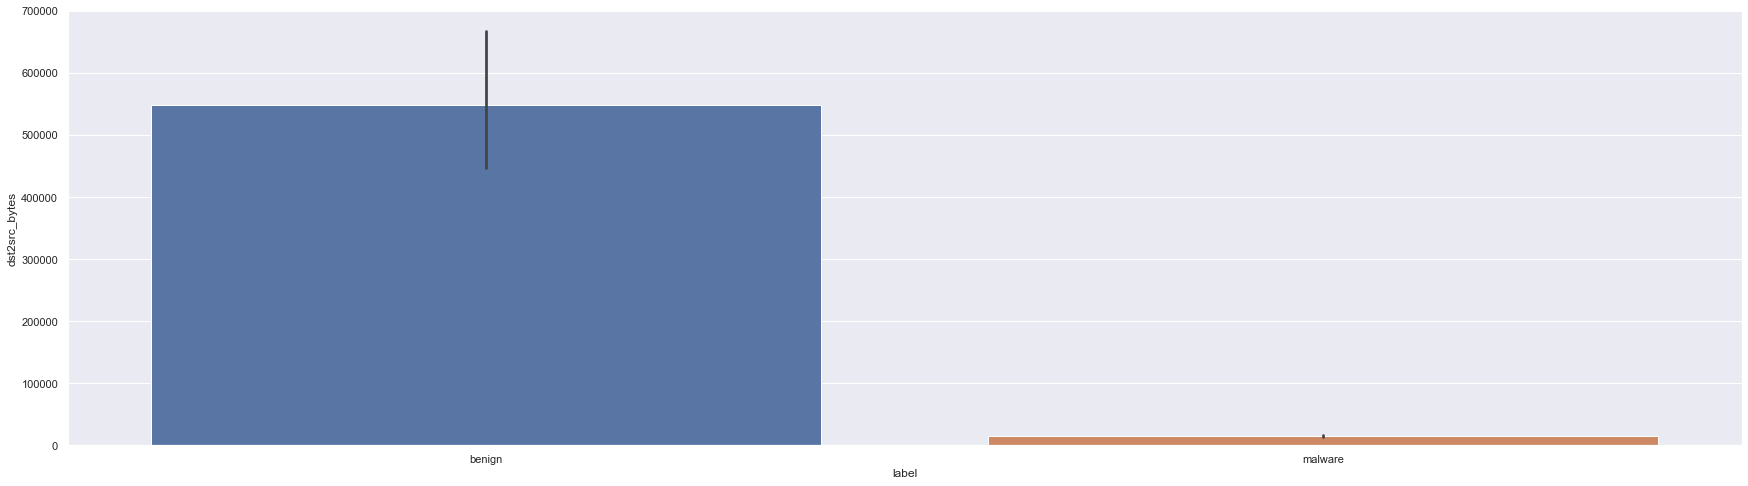

In [83]:
sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(data=df, y='dst2src_bytes', x='label')


<AxesSubplot:xlabel='label', ylabel='src2dst_packets'>

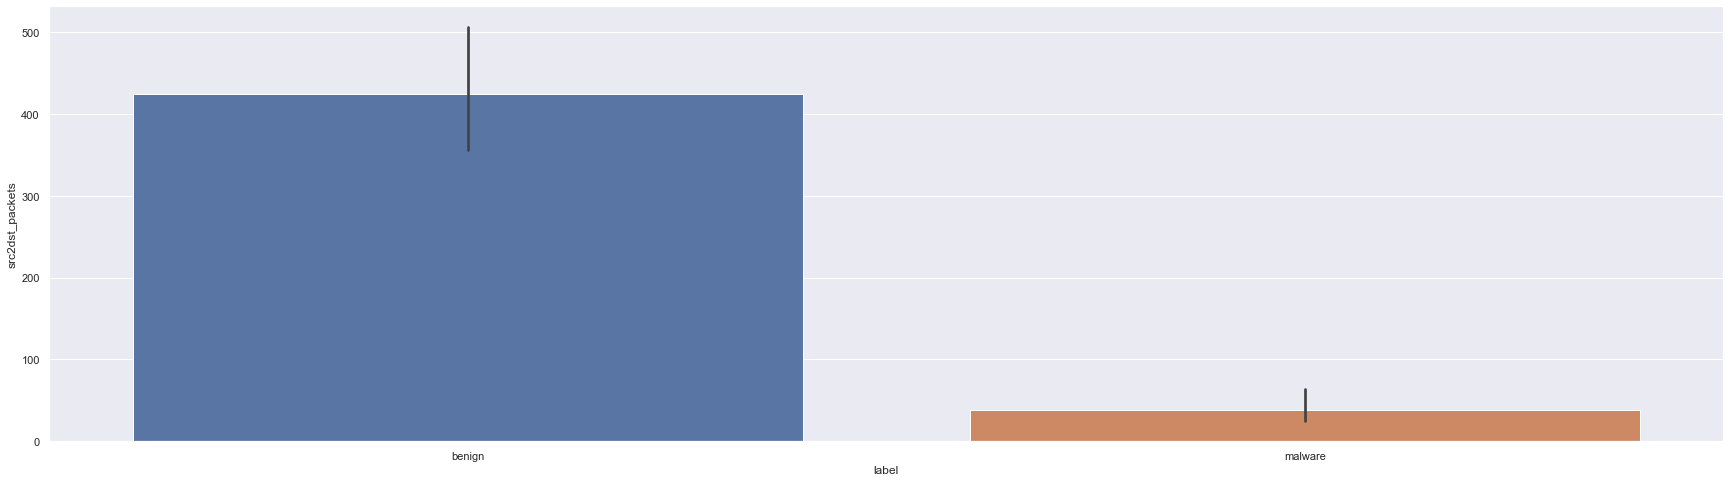

In [84]:
sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(data=df, y='src2dst_packets', x='label')

<AxesSubplot:xlabel='label', ylabel='src2dst_ack_packets'>

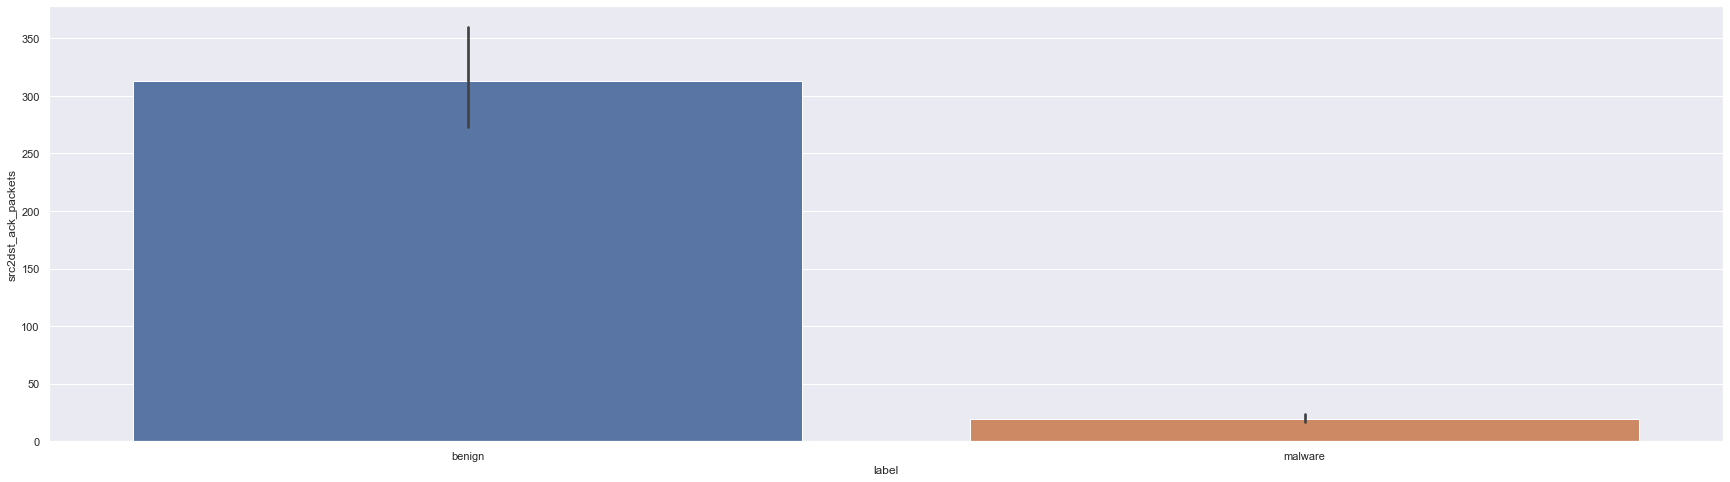

In [85]:

sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(data=df, y='src2dst_ack_packets', x='label')

# preprocess

In [86]:
#whole process in one block!
#preprocess first
df['udps.stnn_image'] = df['udps.stnn_image'].transform(literal_eval)

df2 = df['udps.stnn_image']

arr = df2.to_numpy()

#create numpy array to each parameter and append to him from image
arr_iat_skew_bidiractional = []
arr_size_skew_bidiractional = []
arr_size_skew_src2dst =[]
arr_iat_skew_src2dst = []
arr_iat_skew_dst2src =[]
arr_size_skew_dst2src = []
arr_iat_skew_handshake = []
arr_size_skew_handshake = []
arr_iat_skew_data = []
arr_size_skew_data = []
arr_pkts2time_bidiractional = []
arr_bytes2time_bidiractional = []
arr_pkts2time_src2dst = []
arr_bytes2time_src2dst = []
arr_pkts2time_dst2src = []
arr_bytes2time_dst2src = []
arr_pkts2time_handshake = []
arr_bytes2time_handshake = []
arr_pkts2time_data = []
arr_bytes2time_data = []
for i in range(len(arr)):
    for j in range(5):
        if j==0:
            arr_pkts2time_bidiractional.append(arr[i][j][12])
            arr_bytes2time_bidiractional.append(arr[i][j][13]) 
            arr_iat_skew_bidiractional.append(arr[i][j][4])
            arr_size_skew_bidiractional.append(arr[i][j][9])
        if j==1:
            arr_pkts2time_src2dst.append(arr[i][j][12])
            arr_bytes2time_src2dst.append(arr[i][j][13]) 
            arr_size_skew_src2dst.append(arr[i][j][4])
            arr_iat_skew_src2dst.append(arr[i][j][9])
        if j==2:
            arr_pkts2time_dst2src.append(arr[i][j][12])
            arr_bytes2time_dst2src.append(arr[i][j][13]) 
            arr_iat_skew_dst2src.append(arr[i][j][4])
            arr_size_skew_dst2src.append(arr[i][j][9])
        if j==3:
            arr_pkts2time_handshake.append(arr[i][j][12])
            arr_bytes2time_handshake.append(arr[i][j][13]) 
        if j==4:
            arr_pkts2time_data.append(arr[i][j][12])
            arr_bytes2time_data.append(arr[i][j][13]) 
            arr_size_skew_data.append(arr[i][j][4])
            arr_iat_skew_data.append(arr[i][j][9])

df_stdn = pd.DataFrame(list(zip(
                                # arr_pkts2time_bidiractional,arr_bytes2time_bidiractional,arr_iat_skew_bidiractional,arr_size_skew_bidiractional,
                                arr_pkts2time_src2dst,arr_bytes2time_src2dst,arr_size_skew_src2dst,arr_iat_skew_src2dst,
                                arr_pkts2time_dst2src,arr_bytes2time_dst2src,arr_iat_skew_dst2src,arr_size_skew_dst2src,
                                arr_pkts2time_handshake
                                #,arr_bytes2time_handshake
                                # arr_pkts2time_data,arr_bytes2time_data,arr_size_skew_data,arr_iat_skew_data
                                ))
                        ,columns=[
                                # 'pkts2time_bidiractional','bytes2time_bidiractional','iat_skew_bidiractional','size_skew_bidiractional',
                                'pkts2time_src2dst','bytes2time_src2dst','size_skew_src2dst','iat_skew_src2dst',
                                'pkts2time_dst2src','bytes2time_dst2src','iat_skew_dst2src','size_skew_dst2src',
                                'pkts2time_handshake'
                                #,'bytes2time_handshake'
                                # 'pkts2time_data','bytes2time_data','size_skew_data','iat_skew_data'
                                ])
# df_stdn



# join regular DataFrame

In [87]:
#we can play with the variables
df_regular = df[[
                # 'bidirectional_bytes',
                # 'bidirectional_stddev_piat_ms',
                # 'bidirectional_stddev_ps',
                # 'bidirectional_packets',
                # 'bidirectional_duration_ms',
                # 'bidirectional_mean_ps',
                # 'bidirectional_psh_packets',
                # 'bidirectional_ack_packets',
                'src2dst_bytes',
                'src2dst_packets',
                'src2dst_stddev_ps',
                'src2dst_stddev_piat_ms',
                'src2dst_duration_ms',
                'src2dst_psh_packets',
                'src2dst_mean_piat_ms',
                'src2dst_ack_packets',
                'dst2src_bytes',
                'dst2src_packets',
                'dst2src_stddev_piat_ms',
                'dst2src_min_piat_ms',
                'dst2src_ack_packets',
                'dst2src_min_ps',
                'dst2src_bytes',
                'dst2src_duration_ms'
                ]]
# df_regular

In [88]:
#merge
result = df_stdn.join(df_regular)
# result

In [90]:
result.describe()

,pkts2time_src2dst,bytes2time_src2dst,size_skew_src2dst,iat_skew_src2dst,pkts2time_dst2src,bytes2time_dst2src,iat_skew_dst2src,size_skew_dst2src,pkts2time_handshake,src2dst_bytes,...,src2dst_mean_piat_ms,src2dst_ack_packets,dst2src_bytes,dst2src_packets,dst2src_stddev_piat_ms,dst2src_min_piat_ms,dst2src_ack_packets,dst2src_min_ps,dst2src_bytes,dst2src_duration_ms
count,40738.000000,4.073800e+04,40738.000000,40738.000000,40738.000000,4.073800e+04,40738.000000,40738.000000,40738.000000,4.073800e+04,...,4.073800e+04,40738.000000,4.073800e+04,40738.000000,4.073800e+04,4.073800e+04,40738.000000,40738.000000,4.073800e+04,4.073800e+04
mean,27.632509,2.698200e+04,2.064177,1.419141,42.166154,3.940229e+04,0.983763,0.960977,76.980215,1.773032e+05,...,3.944999e+06,166.084737,2.814020e+05,306.737346,9.634741e+06,2.542311e+04,247.793952,8.108375,2.814020e+05,7.321162e+07
std,418.946533,8.827027e+05,1.089780,0.849473,397.817556,5.221095e+05,1.341209,0.965268,308.097382,8.208077e+06,...,1.389637e+07,2378.204326,5.804549e+06,5053.365890,2.850165e+07,2.888588e+05,4098.353882,59.355835,5.804549e+06,1.859291e+08
min,0.000003,0.000000e+00,-5.388159,-5.388159,0.000000,0.000000e+00,-3.469875,-4.587317,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.077545,4.522138e+00,1.499962,0.914036,0.087421,5.847056e+00,0.001942,0.528865,6.000000,8.690000e+02,...,1.650365e+02,6.000000,8.400000e+02,6.000000,1.251225e+02,0.000000e+00,5.000000,0.000000,8.400000e+02,6.690000e+02
50%,0.349811,4.429073e+01,2.267788,1.453178,0.467070,1.655099e+02,0.713931,1.081993,24.000000,1.660000e+03,...,2.939429e+03,15.000000,4.464000e+03,18.000000,4.649754e+03,0.000000e+00,18.000000,0.000000,4.464000e+03,9.777800e+04
75%,6.914700,4.101771e+02,2.806507,1.885523,11.610429,3.019120e+03,1.825998,1.603940,43.000000,3.494000e+03,...,1.558725e+04,30.000000,1.538250e+04,38.000000,2.017991e+04,0.000000e+00,34.000000,0.000000,1.538250e+04,3.691168e+05
max,26453.102000,6.219304e+07,5.387891,5.033847,30887.225000,4.623197e+07,5.001207,4.364358,4000.000000,1.079183e+09,...,3.808447e+08,292481.000000,7.398631e+08,566258.000000,8.667107e+08,9.422354e+06,566258.000000,1350.000000,7.398631e+08,2.451451e+09


# Training Binary 

In [91]:
x= result
y = np.stack(df['label'])

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.20,  # train 
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32590, 25) (32590,)
(8148, 25) (8148,)


In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model =  RandomForestClassifier()

# Train Model

model.fit(X_train, y_train)

RandomForestClassifier()

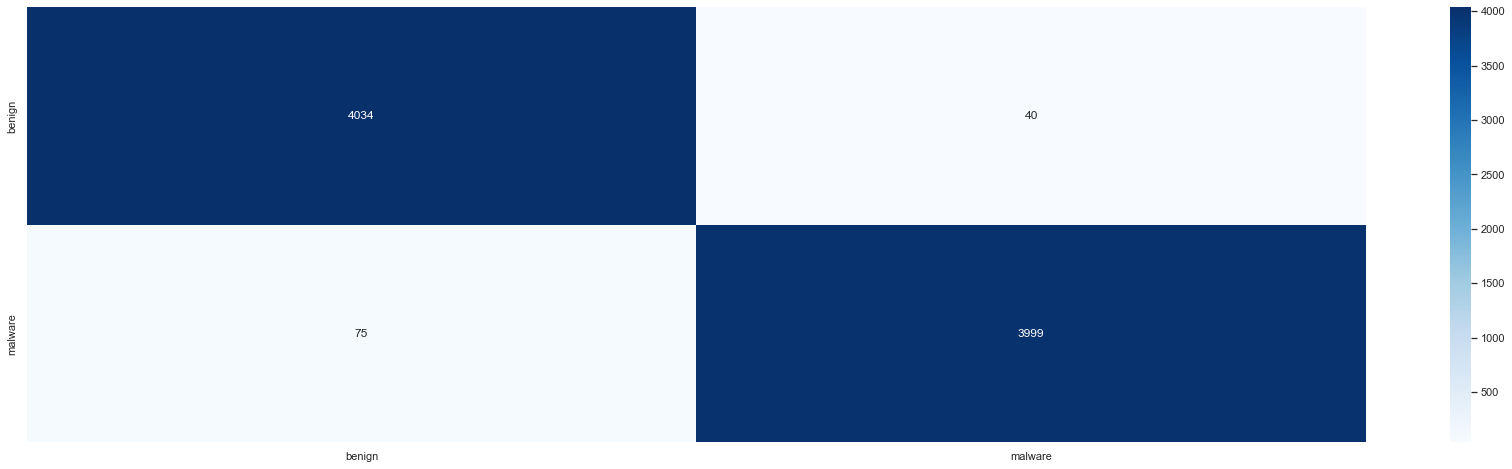

In [94]:
predictions = model.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)

heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# Save results in file
save_classification_report(
    classification_report(true_labels, predictions),
    cf_matrix,
    heatmap,
    'reports/'
)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

      benign       0.98      0.99      0.99      4074
     malware       0.99      0.98      0.99      4074

    accuracy                           0.99      8148
   macro avg       0.99      0.99      0.99      8148
weighted avg       0.99      0.99      0.99      8148



# submision

In [96]:
'''
There are two types of submissions:
1. 'val': Validation set, a small sized test to check your results with - should be private.
2. 'test': Test set - a bigger test - this is the public submission.
'''

submission_type = 'test' # other option: 'test', for zero-day choose 'val'

In [97]:
'''
Load the validation or test data into a DataFrame from the CSV, check that the path is correct.
'''
df = pd.read_csv(f'./datasets/{dataset_type}/x_{submission_type}.csv')


In [98]:
#whole process in one block!
#preprocess first
df['udps.stnn_image'] = df['udps.stnn_image'].transform(literal_eval)

df2 = df['udps.stnn_image']

arr = df2.to_numpy()

#create numpy array to each parameter and append to him from image
arr_iat_skew_bidiractional = []
arr_size_skew_bidiractional = []
arr_size_skew_src2dst =[]
arr_iat_skew_src2dst = []
arr_iat_skew_dst2src =[]
arr_size_skew_dst2src = []
arr_iat_skew_handshake = []
arr_size_skew_handshake = []
arr_iat_skew_data = []
arr_size_skew_data = []
arr_pkts2time_bidiractional = []
arr_bytes2time_bidiractional = []
arr_pkts2time_src2dst = []
arr_bytes2time_src2dst = []
arr_pkts2time_dst2src = []
arr_bytes2time_dst2src = []
arr_pkts2time_handshake = []
arr_bytes2time_handshake = []
arr_pkts2time_data = []
arr_bytes2time_data = []
for i in range(len(arr)):
    for j in range(5):
        if j==0:
            arr_pkts2time_bidiractional.append(arr[i][j][12])
            arr_bytes2time_bidiractional.append(arr[i][j][13]) 
            arr_iat_skew_bidiractional.append(arr[i][j][4])
            arr_size_skew_bidiractional.append(arr[i][j][9])
        if j==1:
            arr_pkts2time_src2dst.append(arr[i][j][12])
            arr_bytes2time_src2dst.append(arr[i][j][13]) 
            arr_size_skew_src2dst.append(arr[i][j][4])
            arr_iat_skew_src2dst.append(arr[i][j][9])
        if j==2:
            arr_pkts2time_dst2src.append(arr[i][j][12])
            arr_bytes2time_dst2src.append(arr[i][j][13]) 
            arr_iat_skew_dst2src.append(arr[i][j][4])
            arr_size_skew_dst2src.append(arr[i][j][9])
        if j==3:
            arr_pkts2time_handshake.append(arr[i][j][12])
            arr_bytes2time_handshake.append(arr[i][j][13]) 
        if j==4:
            arr_pkts2time_data.append(arr[i][j][12])
            arr_bytes2time_data.append(arr[i][j][13]) 
            arr_size_skew_data.append(arr[i][j][4])
            arr_iat_skew_data.append(arr[i][j][9])

df_stdn = pd.DataFrame(list(zip(
    # arr_pkts2time_bidiractional,arr_bytes2time_bidiractional,arr_iat_skew_bidiractional,arr_size_skew_bidiractional,
                                arr_pkts2time_src2dst,arr_bytes2time_src2dst,arr_size_skew_src2dst,arr_iat_skew_src2dst,
                                arr_pkts2time_dst2src,arr_bytes2time_dst2src,arr_iat_skew_dst2src,arr_size_skew_dst2src,
                                arr_pkts2time_handshake
                                #,arr_bytes2time_handshake
                                # arr_pkts2time_data,arr_bytes2time_data,arr_size_skew_data,arr_iat_skew_data
                                ))
                        ,columns=[
                            # 'pkts2time_bidiractional','bytes2time_bidiractional','iat_skew_bidiractional','size_skew_bidiractional',
                                'pkts2time_src2dst','bytes2time_src2dst','size_skew_src2dst','iat_skew_src2dst',
                                'pkts2time_dst2src','bytes2time_dst2src','iat_skew_dst2src','size_skew_dst2src',
                                'pkts2time_handshake'
                                #,'bytes2time_handshake'
                                # 'pkts2time_data','bytes2time_data','size_skew_data','iat_skew_data'
                                ])
# df_stdn



In [99]:
#we can play with the variables
df_regular = df[[
                # 'bidirectional_bytes',
                # 'bidirectional_stddev_piat_ms',
                # 'bidirectional_stddev_ps',
                # 'bidirectional_packets',
                # 'bidirectional_duration_ms',
                # 'bidirectional_mean_ps',
                # 'bidirectional_psh_packets',
                # 'bidirectional_ack_packets',
                'src2dst_bytes',
                'src2dst_packets',
                'src2dst_stddev_ps',
                'src2dst_stddev_piat_ms',
                'src2dst_duration_ms',
                'src2dst_psh_packets',
                'src2dst_mean_piat_ms',
                'src2dst_ack_packets',
                'dst2src_bytes',
                'dst2src_packets',
                'dst2src_stddev_piat_ms',
                'dst2src_min_piat_ms',
                'dst2src_ack_packets',
                'dst2src_min_ps',
                'dst2src_bytes',
                'dst2src_duration_ms'
                ]]
# df_regular

In [100]:
#merge
result = df_stdn.join(df_regular)
# result

In [101]:
# Test Model/Predict
'''
Here we extract again our 3 features, and let the model predict results over the validiation or test set.
the results are saved under the name of 'predictions.txt' which you might need to upload to evalai website.
'''
X = result
predictions = model.predict(X)

enc = LabelEncoder()
np.savetxt('predictions.txt', enc.fit_transform(predictions), fmt='%2d')

C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dst2src_max_piat_ms
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 26 features, but RandomForestClassifier is expecting 25 features as input.

# Training Multi

In [102]:
from sklearn.model_selection import train_test_split

x = result
y = np.stack(df['malware_family'])

KeyError: 'malware_family'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.20,  # train 
                                                    )

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32590, 26) (32590,)
(8148, 26) (8148,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model =  RandomForestClassifier()

# Train Model
model.fit(X_train, y_train)

RandomForestClassifier()

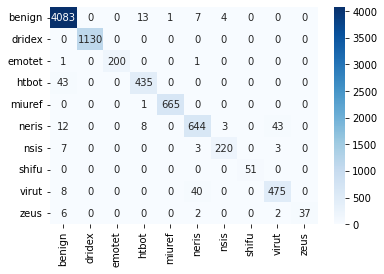

In [ ]:
predictions = model.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)

heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# Save results in file
save_classification_report(
    classification_report(true_labels, predictions),
    cf_matrix,
    heatmap,
    'reports/'
)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

      benign       0.98      0.99      0.99      4108
      dridex       1.00      1.00      1.00      1130
      emotet       1.00      0.99      1.00       202
       htbot       0.95      0.91      0.93       478
      miuref       1.00      1.00      1.00       666
       neris       0.92      0.91      0.92       710
        nsis       0.97      0.94      0.96       233
       shifu       1.00      1.00      1.00        51
       virut       0.91      0.91      0.91       523
        zeus       1.00      0.79      0.88        47

    accuracy                           0.97      8148
   macro avg       0.97      0.94      0.96      8148
weighted avg       0.97      0.97      0.97      8148

